<a href="https://colab.research.google.com/github/mths-miranda/data_science/blob/master/COVID_19_no_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Sigmoidal logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

**Data Science na Prática 3.0**

*by [sigmoidal.ai](https://sigmoidal.ai)*

*Author: [Matheus Miranda](https://www.linkedin.com/in/engenheiromatheusmiranda/)*. September, 2022.

---
<center><img alt="Covid 19" width="60%" src="https://github.com/mths-miranda/data_science/blob/master/img/covid19_starline_freepik.jpg?raw=true"></center>

<center><a href="http://www.freepik.com">Designed by starline / Freepik</a> </center>


O Coronavirus (COVID-19) é uma doença infecciosa causada pelo vírus SARS-CoV-2.

De acordo com a [World Health Organization (WHO)](https://www.who.int/health-topics/coronavirus#tab=tab_1), a maioria da pessoas infectadas pelo vírus irá passar por doenças respirátorias brandas ou moderadas e irão se recuperar sem precisar de tratamento especial. No entanto, como todos já tiveram oportunidades de constatar nesses últimos anos, alguns casos ficarão gravemente doentes, o que requer cuidados médicos específicos. Algumas pessoas com condições como cancêr, doenças cardiovasculares, diabetes, sobrepeso, são mais propensos a evoluirem para doenças graves. Qualquer um pode adoecer de Covid, ficar gravemente doente ou morrer, em qualquer idade.

##Você sabia?

O nome Covid é a junção de letras que se referem a **co**-rona **vi**-rus **d** -isease, em português: "doença do coronavírus". Já o número 19 se refere ao ano de 2019, quando os primeiros casos foram publicamente divulgados.

Fonte: [Portal Fiocruz](https://portal.fiocruz.br/)

##Panorama do Covid

Com intuito de elevar a consciênica sobre o Covid no Brasil e no Mundo e reconhecer o atual cenário da pandemia, irei fazer uma análise sobre dados públicos da doença.

##Obtenção de dados

Os dados que utilizo nesse projeto são fornecidos pela iniciativa [Our World in Data (OWiD)](https://ourworldindata.org/), que é uma fundação fruto da parceria entre pesquisadores da Universidade de Oxford e a organização sem fins lucrativos [Global Change Data Lab](https://global-change-data-lab.org/).

O [OWiD]((https://ourworldindata.org/) reúne e organiza dados sobre grandes temas do mundo como a pobreza, doenças, fome, mudanças climáticas, guerra, riscos existenciais e desigualdade. O objetivo do trabalho da organização, assim como eles citam em sua página, é publicar "pesquisas e dados para progredir contra os maiores problemas do mundo". 

Os dados sobre o Covid-19 são atualizados diariamente (enquanto persistir a pandemia), e disponibilizados em seu repositório no [GitHub](https://github.com/owid/covid-19-data/tree/master/public/data). Nesse projeto, a conexão com a fonte de dados é online, logo, alguma conclusão tomada nessa data, pode não ser mais coerente em um cenário futuro.

*Data da análise: 24 de Setembro de 2022.*

In [1]:
#instalando bibliotecas
!pip install bar_chart_race -q

     |████████████████████████████████| 156 kB 15.8 MB/s 


In [2]:
#importando os pacotes necessários
import pandas as pd
from pandas.io.formats.info import DataFrameInfo

import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

import seaborn as sns
import bar_chart_race as bcr
import numpy as np

In [3]:
#importando os dados para um dataframe
df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')

##Análisando os dados

As variáveis que compõem os dados coletados e fornecidos pela OWiD, que estou aplicando nesse *dataset*, trazem informações principalmente sobre os casos confirmados, mortes, hospitalizações e testes. Também há diversas outras informações que podem ser úteis na nossa exploração.

**Dicionário de Variáveis**

Para reconhecer melhor o *dataset*, vou listar aqui as variáveis que iremos encontrar. Esse dicionário de variáveis mais completo você encontra no [repósitorio do OWiD]('https://github.com/owid/covid-19-data/tree/master/public/data').

* `aged_65_older`: parcela da população com 65 anos ou mais.
* `aged_70_older`: parcela da população com 70 anos ou mais, em 2015.
* `cardiovasc_death_rate`: taxa de mortalidade por doença cardiovascular em 2017 (número anual de mortes por 100 mil pessoas).
* `continent`: continente da localização geográfica.
* `date`: data do registro.
* `diabetes_prevalence`: prevalência de diabetes (% da população de 20 a 79 anos) em 2017.
* `excess_mortality_cumulative_absolute`: diferença cumulativa entre o número de mortes desde 01/01/2020 e o número projetado de mortes para o mesmo período com base em anos anteriores.
* `excess_mortality_cumulative_per_million`: diferença cumulativa entre o número de mortes desde 01/01/2020 e o número projetado de mortes para o mesmo período com base em anos anteriores, por 1 milhão de pessoas.
* `excess_mortality_cumulative`: diferença (percentual) entre número acumulado de mortes desde 01/01/2022 e mortes cumulativas projetadas para o mesmo período com base em anos anteriores. 
* `excess_mortality`: diferença (percentual) entre mortes registradas (semanal ou mensal) em 2020-2021 versus o número de mortes projetadas para o mesmo período com base em anos anteriores.
* `extreme_poverty`: parcela da população que vive em pobreza extrema.
* `female_smokers`: parcela de mulheres que fumam.
* `gdp_per_capita`: Produto Interno Bruto (PIB) comparado ao poder de compra.
* `handwashing_facilities`: parcela da população que possui instalações básicas que permitam lavar as mãos.
* `hosp_patients_per_million`: número de pacientes com Covid-19 em hospitais por 1 milhão de pessoas.
* `hosp_patients`: número de pacientes com Covid-19 em hospitais.
* `hospital_beds_per_thousand`: camas hospitalares, por 1 mil pessoas.
* `human_development_index`: índice que mede o desempenho médio em três dimensões do desenvolvimento humano: uma vida longa e saudável, conhecimento e um padrão de vida decente.
* `icu_patients_per_million`: número de pacientes com Covid-19 em UTI's por 1 milhão de pessoas.
* `icu_patients`: número de pacientes com Covid-19 em UTI's.
* `iso_code`: código ISO dos países (3 letras).
* `life_expectancy`: expectativa de vida, para nascidos em 2019.
* `location`: localização geográfica.
* `male_smokers`: parcela de homens que fumam.
* `median_age`: idade média da população.
* `new_cases_per_million`: novos casos por 1 milhão de pessoas.
* `new_cases_smoothed_per_million`: novos casos (suavizadas 7 dias) por 1 milhão de pessoas.
* `new_cases_smoothed`: novos casos de Covid-19, suavizadas 7 dias.
* `new_cases`: novos casos de Covid-19.
* `new_deaths_per_million`: novas mortes por 1 milhão de pessoas.
* `new_deaths_smoothed_per_million`: novas mortes (suavizadas 7 dias) por 1 milhão de pessoas.
* `new_deaths_smoothed`: novas mortes por Covid-19 (suavizadas 7 dias).
* `new_deaths`: novas mortes por Covid-19.
* `new_people_vaccinated_smoothed_per_hundred`: número diário de pessoas que recebem a primeira dose (suavizado de 7 dias), por 100 pessoas.
* `new_people_vaccinated_smoothed`: número diário de pessoas que recebem a primeira dose.
* `new_tests_per_thousand`: número de novos testes para Covid-19, para 1 mil pessoas.
* `new_tests_smoothed_per_thousand`: número de novos testes para Covid-19, suavizado de 7 dias, por 1 mil pessoas.
* `new_tests_smoothed`: número de novos testes para Covid-19, suavizado de 7 dias.
* `new_tests`: número de novos testes para Covid-19.
* `new_vaccinations_smoothed_per_million`: novas doses aplicadas (suavizadas de 7 dias) por 1 milhão de pessoas.
* `new_vaccinations_smoothed`: novas doses aplicadas (suavizadas de 7 dias).
* `new_vaccinations`: novas doses aplicadas. 
* `people_fully_vaccinated_per_hundred`: número de pessoas que receberam todas as doses recomendadas, por 100 pessoas da população total.
* `people_fully_vaccinated`: número de pessoas que receberam todas as doses recomendadas.
* `people_vaccinated_per_hundred`: total de pessoas que receberam pelo menos 1 dose por 100 pessoas da população total.
* `people_vaccinated`: número de pessoas que foram vacinadas (pelo menos 1 dose).
* `population_density`: densidade populacional (por Km²).
* `population`: população.
* `positive_rate`: parcela de testes COVID-19 positivos, dada como uma média contínua de 7 dias (este é o inverso de tests_per_case).
* `reproduction_rate`: estivamativa em tempo real de reprodução do Covid-19.
* `stringency_index`: Índice de Rigidez da Resposta do Governo: medida composta com base em 9 indicadores de resposta, incluindo fechamento de escolas, fechamento de locais de trabalho e proibição de viagens, reescalonado para um valor de 0 a 100 (100 = resposta mais rigorosa)
* `tests_per_case`: testes realizados por novo caso confirmado de COVID-19, dados como uma média contínua de 7 dias (este é o inverso de positive_rate).
* `tests_units`: unidade usadas pelo local para relatar seus dados de teste.
* `total_boosters_per_hundred`: total de doses de reforço (além do recomendado) por 100 pessoas da população total.
* `total_boosters`: número total de doses de reforço, aplicadas além das doses recomendadas.
* `total_cases_per_million`: total de casos confirmados por 1 milhão de pessoas.
* `total_cases`: total de casos confirmados de Covid-19.
* `total_deaths_per_million`: total de mortes por 1 milhão de pessoas.
* `total_deaths`: total de mortes registradas por Covid-19.
* `total_tests_per_thousand`: número total de testes para Covid-19, para 1 mil pessoas.
* `total_tests`: número total de testes para Covid-19.
* `total_vaccinations_per_hundred`: número de doses aplicadas por 100 pessoas da população total.
* `total_vaccinations`: número total de doses de vacina aplicadas.
* `weekly_hosp_admissions_per_million`: número de pacientes com Covid-19 recém adimitidos (última semana) em hospitais, por 1 milhão de pessoas.
* `weekly_hosp_admissions`:  número de pacientes com Covid-19 recém adimitidos (última semana) em hospitais.
* `weekly_icu_admissions_per_million`: número de pacientes com Covid-19 recém adimitidos (última semana) em UTI's, por 1 milhão de pessoas.
* `weekly_icu_admissions`: número de pacientes com Covid-19 recém adimitidos (6 dias) em UTI's.

**Dimensões do DataFrame**

O nosso *DataFrame* tem atualmente 67 variáveis. As entradas são atualizadas diariamente, e já contabilizam mais de 206 mil registros.

In [91]:
#identificar o tamanho do DataFrame
print("\nVariáveis do DataFrame: {}".format(df.shape[1]),
      "\nNúmero de entradas: {}".format(df.shape[0]))


Variáveis do DataFrame: 67 
Número de entradas: 218944


In [92]:
#identificar as 5 primeiras entradas do DataFrame
df.head()

iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-02-24          5.0        5.0   
1      AFG      Asia  Afghanistan  2020-02-25          5.0        0.0   
2      AFG      Asia  Afghanistan  2020-02-26          5.0        0.0   
3      AFG      Asia  Afghanistan  2020-02-27          5.0        0.0   
4      AFG      Asia  Afghanistan  2020-02-28          5.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         NaN                  NaN  ...   
1                 NaN           NaN         NaN                  NaN  ...   
2                 NaN           NaN         NaN                  NaN  ...   
3                 NaN           NaN         NaN                  NaN  ...   
4                 NaN           NaN         NaN                  NaN  ...   

   female_smokers  male_smokers  handwashing_facilities  \
0             NaN           NaN                  37.746   
1             NaN           NaN                  37.746   
2             NaN           NaN                  37.746   
3             NaN           NaN                  37.746   
4             NaN           NaN                  37.746   

   hospital_beds_per_thousand  life_expectancy  human_development_index  \
0                         0.5            64.83                    0.511   
1                         0.5            64.83                    0.511   
2                         0.5            64.83                    0.511   
3                         0.5            64.83                    0.511   
4                         0.5            64.83                    0.511   

   excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
0                                   NaN                          NaN   
1                                   NaN                          NaN   
2                                   NaN                          NaN   
3                                   NaN                          NaN   
4                                   NaN                          NaN   

   excess_mortality  excess_mortality_cumulative_per_million  
0               NaN                                      NaN  
1               NaN                                      NaN  
2               NaN                                      NaN  
3               NaN                                      NaN  
4               NaN                                      NaN  

[5 rows x 67 columns]

Como você pode ter observado, eu mostrei que o *DataFrame* possui 67 variáveis, porém, ao visualizar as 5 primeiras entradas, a biblioteca `pandas` tem um limite de exibição de 20 variáveis.

Vamos identificar as variáveis e também o tipo (`type`) de cada uma delas. Nessa identificação, vou também ordenar as variávéis que mais possuem entradas não vazias (não são valores ausentes).

In [93]:
#identificar os tipos das colunas
df[df.notna().sum().sort_values(ascending=False).index].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218944 entries, 0 to 218943
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    218944 non-null  object 
 1   location                                    218944 non-null  object 
 2   date                                        218944 non-null  object 
 3   population                                  217666 non-null  float64
 4   total_cases                                 209991 non-null  float64
 5   new_cases                                   209725 non-null  float64
 6   total_cases_per_million                     209030 non-null  float64
 7   new_cases_per_million                       208764 non-null  float64
 8   new_cases_smoothed                          208529 non-null  float64
 9   new_cases_smoothed_per_million              207573 non-null  float64
 

Nos tipos de variáveis já podemos identificar que a variável `date` está classificada como tipo `object`. Vamos fazer uma correção.

In [94]:
#criar uma cópia do DataFrame
df_clean = df.copy()

In [95]:
#alterar type da variável date para datetime
df_clean.date = pd.to_datetime(df_clean.date)

In [96]:
#verificando se a mudança foi efetiva
df_clean.dtypes

iso_code                                           object
continent                                          object
location                                           object
date                                       datetime64[ns]
total_cases                                       float64
                                                ...      
human_development_index                           float64
excess_mortality_cumulative_absolute              float64
excess_mortality_cumulative                       float64
excess_mortality                                  float64
excess_mortality_cumulative_per_million           float64
Length: 67, dtype: object

**Tratando valores ausentes**

Valores ausentes podem tornar as variáveis inutilizadas para análises, pois induzem a interpretações incorretas dos dados. Vamos inicialmente identificar se alguma variável pode ser desconsiderada na nossa análise, em função da quantidade de valores que estão ausentes.



In [97]:
#identificando valores ausentes
(df_clean.isnull().sum() / df_clean.shape[0]).sort_values(ascending=False) * 100

weekly_icu_admissions_per_million          96.710118
weekly_icu_admissions                      96.710118
excess_mortality_cumulative_per_million    96.679059
excess_mortality_cumulative                96.679059
excess_mortality_cumulative_absolute       96.679059
                                             ...    
total_cases                                 4.089173
population                                  0.583711
date                                        0.000000
location                                    0.000000
iso_code                                    0.000000
Length: 67, dtype: float64

Ao identificar o percentual de valores ausentes e também observando a tabela  com as informações dos tipos de variávies (classificadas por valores não nulos), vemos que 6 variáveis possuem mais do que 96% de valores ausentes.

Vou excluir essas variavéis do nosso `dataframe`.

In [98]:
#excluir a variáveis
df_clean.drop(columns=['excess_mortality_cumulative_absolute', 
                       'excess_mortality_cumulative', 
                       'excess_mortality', 
                       'excess_mortality_cumulative_per_million', 
                       'weekly_icu_admissions_per_million', 
                       'weekly_icu_admissions'], inplace = True)

In [99]:
#verificando número de variáveis que permancem no dataframe
df_clean.shape[1]

61

#O Covid-19 no Mundo

###Quais são os países que tem mais registros de Casos e registros de Mortes atualmente?

Em nosso *DataFrame* temos listados 231 localidades (países, províncias e dados acumulados por continentes), na data em que os dados foram atualizados.

In [100]:
#identificar a data mais atual
print("\nA data mais atual do DataFrame é: {}".format(df_clean.date.max()))


A data mais atual do DataFrame é: 2022-09-24 00:00:00


In [102]:
#definindo a data que será utilizada como mais recente
data_atual = "2022-09-24"

#identificando quantos países foram registrados na data mais atual completa
df_clean.location[df_clean.date==data_atual].count()

231

Vou identificar primeiro quais são as entradas que possuem maior registros de casos e também de mortes por Covid-19. Porém, através da documentação do nosso *dataset* sei que existem entradas com números acumulados por regiões, que são:

* OWID_WRL:	World (Mundial)
* OWID_INT:	International (Internacional)
* OWID_AFR:	Africa (África)
* OWID_ASI:	Asia (Ásia)
* OWID_EUR:	Europe (Europa)
* OWID_OCE:	Oceania (Oceania)
* OWID_SAM:	South America (América do Sul)
* OWID_NAM:	North America (América do Norte)
* OWID_EUN:	European Union (União Européria)
* OWID_LIC:	Low income (Baixa renda)
* OWID_LMC:	Lower middle income (Renda média baixa)
* OWID_HIC:	High income (Alta renda) 
* OWID_UMC:	Upper middle income (Renda média alta)
* OWID_CYN:	Northern Cyprus (Região Norte do Chipre)
* OWID_KOS:	Kosovo (país Kosovo)


Certamente, se eu tentasse identificar as entradas com maiores índices, terei como retorno algumas dessas regiões, já que elas acumulam os números dos seus países. Vamos confirmar essa hipótese observando as 10 entradas com maior registro de mortes.

In [103]:
#identificando localidades com maior registro de mortes
df_clean.loc[df_clean.date == data_atual, ['location', 'total_deaths', 'gdp_per_capita']].sort_values(by="total_deaths", ascending=False)[0:10]

location  total_deaths  gdp_per_capita
216205                World     6536187.0       15469.207
86140           High income     2665354.0             NaN
209153  Upper middle income     2489514.0             NaN
64101                Europe     1938508.0             NaN
144958        North America     1509557.0             NaN
11343                  Asia     1483147.0             NaN
116296  Lower middle income     1333628.0             NaN
182937        South America     1328548.0             NaN
65077        European Union     1146225.0             NaN
207358        United States     1056409.0       54225.446

Em primeiro lugar, a entrada mundial *(World)* acumulado das mortes, como já era esperado.

Nesse ranking, temos a presença do fator renda no topo (2ª e 3ª posição). Porém, o que me surpreende é , entre o fator renda, o maior registro de mortes aconteceu para "Alta renda *(High Income)*" e logo após para "Renda média alta *(Upper midle income)*". Diferente do que normalmente se espera quando a questão é a saúde no mundo, onde temos a percepção de que as classes de baixa renda são mais afetas, nossos dados mostraram outro comportamento para o Covid-19. 

Ainda analisando esse ranking, vemos na 4ª posição a "América do Norte *(North America)*", em 5º lugar a "América do Sul *(South America)*" e em 6º lugar a "Europa *(Europe)*". Sabemos que nas regiões da América do Norte e Europa estão presentes os países que são as grandes potências mundiais. Porém, nesta minha análise, não tenho dados para comprovar a relação dessas regiões (com mais mortes) com as classes de renda mais alta (também com mais mortes, nesse mesmo ranking).


Agora, vamos ver se esse comportamento se mantém para os registros de casos positivos para o Covid-19.

In [104]:
#identificando localidades com maior registro de casos positivos
df_clean.loc[df_clean.date == data_atual, ['location', 'total_cases']].sort_values(by="total_cases", ascending=False)[0:10]

location  total_cases
216205                World  614776623.0
86140           High income  378993310.0
64101                Europe  227724125.0
11343                  Asia  184564617.0
65077        European Union  166722265.0
209153  Upper middle income  137542873.0
144958        North America  113903389.0
207358        United States   96065161.0
116296  Lower middle income   95969101.0
182937        South America   63888102.0

Mais uma vez, como previsto, as entradas cumulativas se mantém no topo, aparecendo em 9 das 10 posições. 

Vemos também que nesse rankinng apareceu a América do Norte (North America) e um de seus países, os Estados Unidos (United States), que certamente está contribuindo para a classificação do seu continente nessa lista.

Enfim, o que posso confirmar de imediato é que nosso *DataFrame* trás informações de diferentes perspectivas (classe de renda, números dos continentes e regiões, países, dados globais e etc) e por isso é preciso ter cautela nas nossas análises e comparações entre elas.

Para entender melhor apenas os países, pontualmente, vou desconsiderar as entradas cumulativas (por regiões e continentes, por classe de renda e dados globais) de nosso *DataFrame*.

In [105]:
#criando cópia do dataframe como check point
df_paises = df_clean.loc[df_clean.date == data_atual].copy()

#mostrar dimensões do novo dataframe
print("\nEntradas do dataframe: \t{}".format(df_paises.shape[0]),
      "\nVariáveis do dataframe: {}".format(df_paises.shape[1]))


Entradas do dataframe: 	231 
Variáveis do dataframe: 61


In [106]:
#excluir entradas acumuladas código ISO OWID_
values = ['OWID_AFR',
          'OWID_ASI',
          'OWID_EUR', 
          'OWID_EUN', 
          'OWID_HIC', 
          'OWID_INT',
          'OWID_KOS', 
          'OWID_LIC', 
          'OWID_LMC', 
          'OWID_NAM', 
          'OWID_CYN',
          'OWID_OCE', 
          'OWID_SAM', 
          'OWID_UMC', 
          'OWID_WRL']

#excluir entradas acumuladas código ISO OWID_
df_paises.drop(df_paises.index[df_paises.iso_code.isin(values)], axis=0, inplace=True)

In [107]:
#mostrar dimensões do novo dataframe
print("\nEntradas do dataframe: \t{}".format(df_paises.shape[0]),
      "\nVariáveis do dataframe: {}".format(df_paises.shape[1]))


Entradas do dataframe: 	217 
Variáveis do dataframe: 61


Como quero analisar os registros de casos positivos para Covid-19 e as mortes, vou identificar se existe algum país sem essas informações em nosso *dataset*.

In [108]:
#identificando valores ausentes para total_cases
df_paises.total_cases.isnull().sum()

0

In [109]:
#identificando valores ausentes para total_deaths
df_paises.total_deaths.isnull().sum()

4

Na variável `total_cases` não temos valores ausentes, já  na variavél `total_deaths` temos 3 ocorrências. Vou apagar essas entradas para prosseguir com nossa análise.

Perceba que estou fazendo esse ajuste apenas no *DataFrame* criado para analisar dados mais recentes dos países. Para outras investigações, tomarei outras medidas adequadas.

In [110]:
#excluir valores ausentes total_deaths
df_paises.drop(df_paises[df_paises.total_deaths.isnull()].index, axis=0, inplace=True)

In [111]:
#mostrar nova dimensões do novo dataframe
print("\nEntradas do dataframe: \t{}".format(df_paises.shape[0]),
      "\nVariáveis do dataframe: {}".format(df_paises.shape[1]))


Entradas do dataframe: 	213 
Variáveis do dataframe: 61


Agora vou criar um ranking com os países, de acordo com o registros de **casos positivos** para Covid-19.

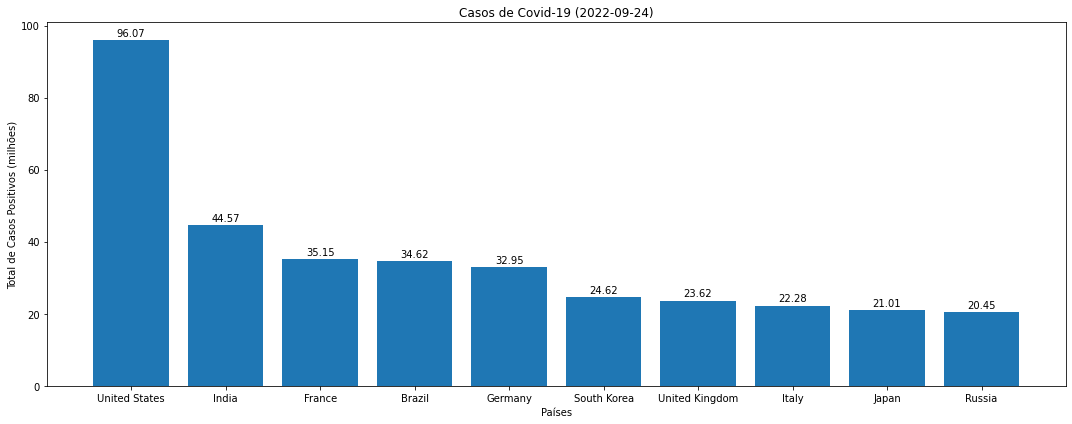

In [154]:
#países com maior total_cases
top10_total_cases = df_paises[['location', 'total_cases']].sort_values(by="total_cases", ascending=False)[0:10]

#convertendo unidade para milhões
top10_total_cases.total_cases = top10_total_cases.total_cases / 1000000

#função para inserir rótulos
def autolabel (grupos):
    for i in grupos:
        h = i.get_height()
        ax.annotate ('{:.2f}'.format(h),
                     xy = (i.get_x()+i.get_width()/2,h),
                     xytext = (0,4),
                     textcoords = 'offset points', 
                     ha = 'center')

#plotar um gráfico com o ranking
fig, ax = plt.subplots(figsize=(15,6))

grupo = ax.bar('location', 'total_cases', data=top10_total_cases)

ax.set_title("Casos de Covid-19 ({})".format(data_atual))
ax.set_ylabel("Total de Casos Positivos (milhões)")
ax.set_xlabel("Países")

autolabel(grupo)

plt.tight_layout()

Esse não é um ranking que gostaríamos de ver nosso país, não é verdade?

Mas, infelizmente, o Brasil aparece em 4ª posição (até essa data) de países com maior número de casos registrados do Covid-19. O que nos chama a atenção aqui é a diferença entre o primeiro (Estados Unidos) e os demais países.

E como está esse cenário para os registros de mortes?

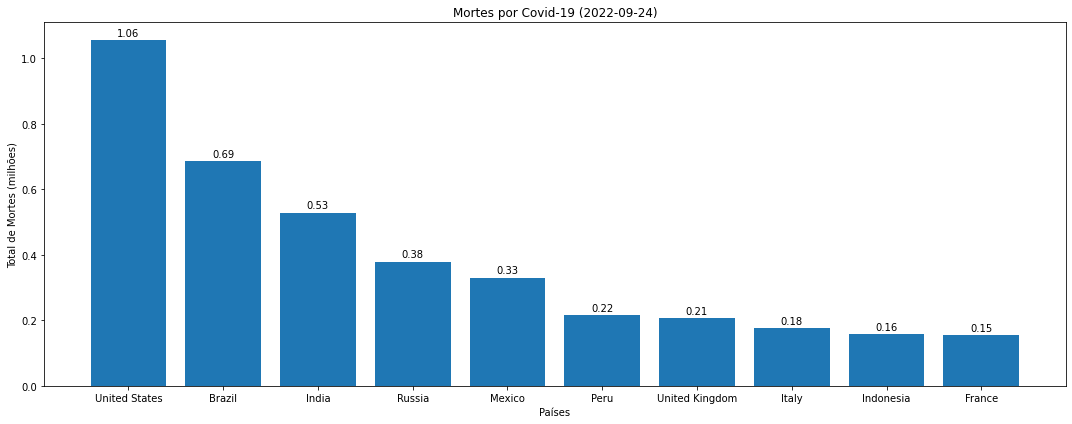

In [155]:
#países com maior total_deaths
top10_total_deaths = df_paises[['location', 'total_deaths']].sort_values(by="total_deaths", ascending=False)[0:10]

#função para inserir rótulos
def autolabel (grupos):
    for i in grupos:
        h = i.get_height()
        ax.annotate ('{:.2f}'.format(h),
                     xy = (i.get_x()+i.get_width()/2,h),
                     xytext = (0,4),
                     textcoords = 'offset points', 
                     ha = 'center')
        
#convertendo unidade para milhões
top10_total_deaths.total_deaths = top10_total_deaths.total_deaths / 1000000

#plotar um gráfico com o ranking
fig, ax = plt.subplots(figsize=(15,6))

grupo = ax.bar('location', 'total_deaths', data=top10_total_deaths)

ax.set_title("Mortes por Covid-19 ({})".format(data_atual))
ax.set_ylabel("Total de Mortes (milhões)")
ax.set_xlabel("Países")

autolabel(grupo)

plt.tight_layout()

Mais uma vez o Brasil aparecendo no ranking, agora em segundo lugar, com mais mortes por Covid-19 registradas entre os países do globo.

É interessante perceber também que os países Alemanha (Germany), Korea do Sul (South Korea) e Japão (Japan) estão no top 10 para casos, mas não estão no ranking de mais mortes.

Já no ranking de mais mortes apareceram o México (Mexico), Peru (Peru) e Indonésia (Indonesia), que não estão entre os top 10 com mais casos de covid.

Apesar do Brasil estar no ranking de mais mortes em segundo lugar, não podemos esquecer que estes são valores absolutos e que a população do Brasil é diferente dos demais países.

O nosso `dataframe` fornece informações relativas entre as mortes e a população. Vou plotar um gráfico para visualizarmos como estão atualmente os países sob essa ótica.

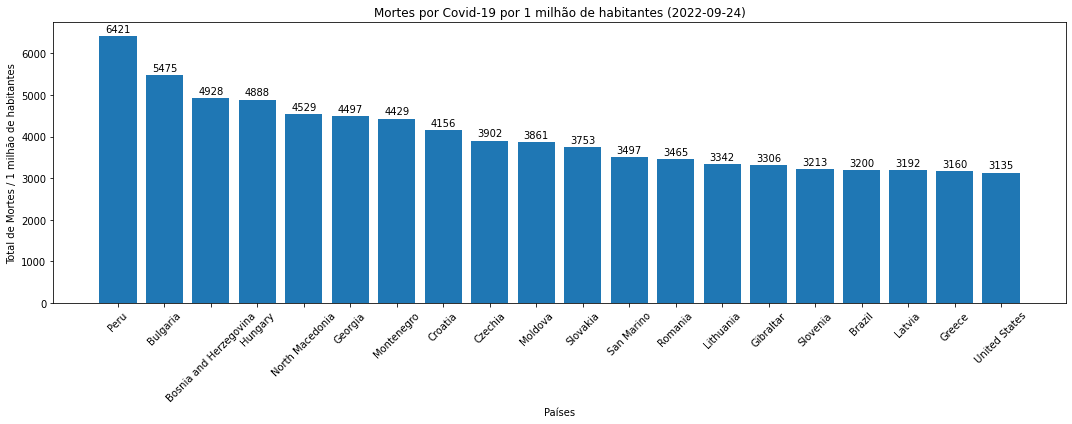

In [173]:
#países com maior total_deaths_per_million
top20_total_deaths_per_million = df_paises[['location', 'total_deaths_per_million', 'population']].sort_values(by="total_deaths_per_million", ascending=False)[0:20]


#função para inserir rótulos
def autolabel (grupos):
    for i in grupos:
        h = i.get_height()
        ax.annotate ('{:.0f}'.format(h),
                     xy = (i.get_x()+i.get_width()/2,h),
                     xytext = (0,4),
                     textcoords = 'offset points', 
                     ha = 'center')
        
#plotar um gráfico com o ranking
fig, ax = plt.subplots(figsize=(15,6))

grupo = ax.bar('location', 'total_deaths_per_million', data=top20_total_deaths_per_million)

ax.set_title("Mortes por Covid-19 por 1 milhão de habitantes ({})".format(data_atual))
ax.set_ylabel("Total de Mortes / 1 milhão de habitantes")
ax.set_xlabel("Países")

autolabel(grupo)

plt.xticks(rotation=45)
plt.tight_layout()

É interessante perceber que o país onde houve mais mortes no mundo (United States) fica em 20º lugar quando observamos esse indicador relativo à sua população. 

O Brasil também cai de posição no ranking, descendo para 17º colocação. Ou seja, proporcionalmente às suas populações, Estados Unidos e Brasil ficam atrás de países com a população menor, porém proporcionalmente mais afetados pelas mortes por Covid-19.

O destaque aqui vai para o Peru, que é o país mais afetado pelas mortes e que, como mostrei anteriormente, está entre os 10 países com mais mortes no mundo. 

Para ter uma visão geral, vejamos como é a população desses países.

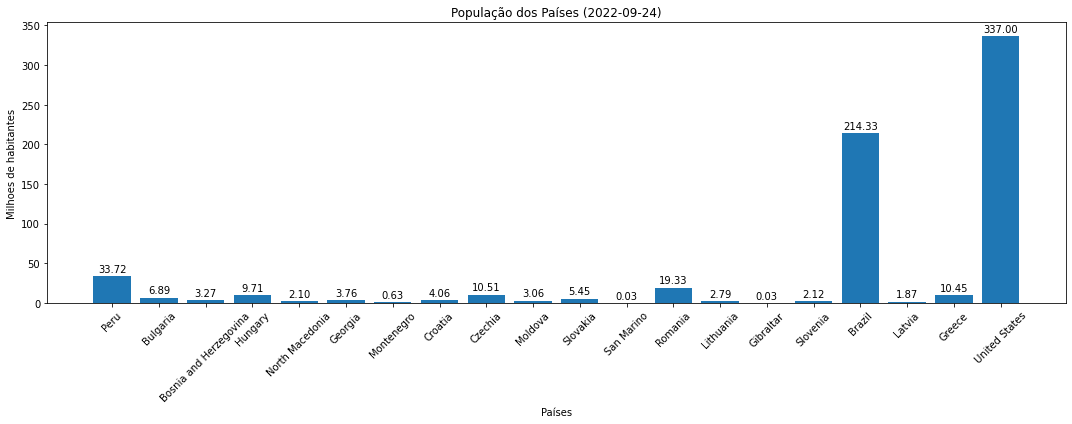

In [174]:
#países com maior total_deaths_per_million
top20_total_deaths_per_million = df_paises[['location', 'total_deaths_per_million', 'population']].sort_values(by="total_deaths_per_million", ascending=False)[0:20]


#função para inserir rótulos
def autolabel (grupos):
    for i in grupos:
        h = i.get_height()
        ax.annotate ('{:.2f}'.format(h),
                     xy = (i.get_x()+i.get_width()/2,h),
                     xytext = (0,4),
                     textcoords = 'offset points', 
                     ha = 'center')

#convertento variavei população para unidade de 1 milhão
top20_total_deaths_per_million.population = top20_total_deaths_per_million.population / 1000000

#plotar um gráfico com o ranking
fig, ax = plt.subplots(figsize=(15,6))

grupo = ax.bar('location', 'population', data=top20_total_deaths_per_million)

ax.set_title("População dos Países ({})".format(data_atual))
ax.set_ylabel("Milhoes de habitantes")
ax.set_xlabel("Países")

autolabel(grupo)

plt.xticks(rotation=45)
plt.tight_layout()

###Como está a evolução do Covid-19 no mundo?

Nosso *dataset* traz informações globais dos casos e mortes por Covid-19. Vou plotar um gráfico para saber como está essas evoluções até o momento, observando o conjunto *World*.

In [117]:
#criar dataframe apenas com dado mundial acumulado (World)
df_world = df_clean.loc[df_clean.iso_code == "OWID_WRL"].copy()

In [118]:
#verificar se existem valores ausentes em total_cases e total_deaths
print("\nValores ausentes em total_cases: {}".format(df_world.total_cases.isnull().sum()))
print("\nValores ausentes em total_deaths: {}".format(df_world.total_deaths.isnull().sum()))


Valores ausentes em total_cases: 0

Valores ausentes em total_deaths: 0


Inicialmente vemos que não temos valores ausentes para tratar nos registros do conjunto *World*,  nas variáveis `total_cases` e `total_deahts` que irei utilizar.


Como o *DataFrame* utilizado é atualizado diariamente e estou fazendo um split apenas com as entradas de *World*, vou definir a variável `date` como o index.

In [119]:
#definindo novo index para dataframe
df_world.index = df_world.date

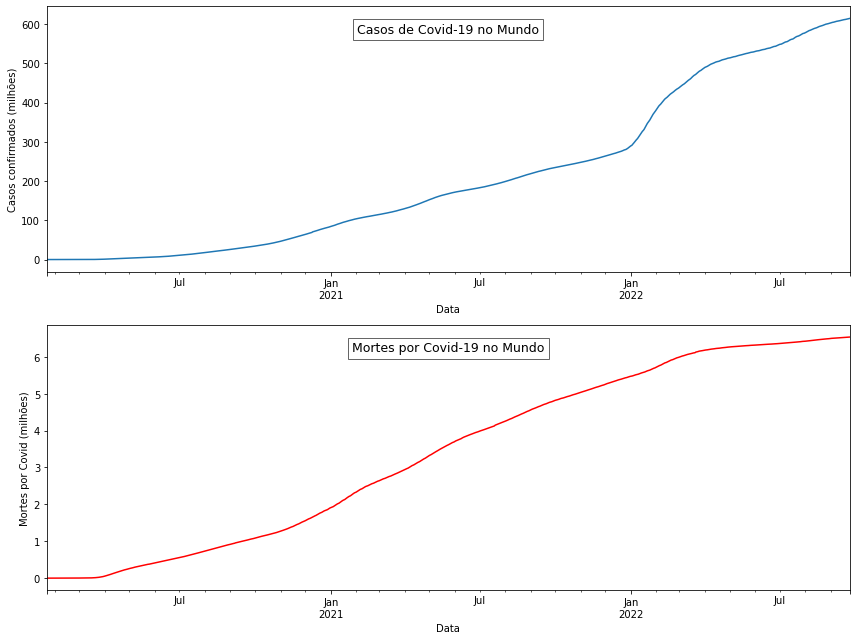

In [181]:
#plotar o número de casos confirmados e de mortes
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols=1, figsize=(12,9)) #criando duas variáveis

def add_titlebox(ax, text):
     ax.text(.50, .9, text,
         horizontalalignment='center',
         transform=ax.transAxes,
         bbox=dict(facecolor='white', alpha=0.6),
         fontsize=12.5)
     return ax

(df_world['total_cases'] / 1000000).plot(kind="line", ax=ax1)
#ax1.set_title("Casos de Covid-19 no Mundo")
add_titlebox(ax1, 'Casos de Covid-19 no Mundo')
ax1.set_ylabel("Casos confirmados (milhões)")
ax1.set_xlabel("Data")

(df_world['total_deaths'] / 1000000).plot(kind="line", ax=ax2, color="r")
#ax2.set_title("Mortes por Covid-19 no Mundo")
add_titlebox(ax2, 'Mortes por Covid-19 no Mundo')
ax2.set_ylabel("Mortes por Covid (milhões)")
ax2.set_xlabel("Data")

plt.tight_layout()
plt.savefig('cases_and_deaths_world.png')

Nesses dois plot comparativos, percebemos que no início do ano de 2022 tivemos picos de crescimento de casos do covid no mundo, acompanhado sutilmente pelo número de mortes no mesmo período.

In [179]:
#data maior registro de novos casos
total_cases_atual = df_world.loc[df_world.date == data_atual, 'total_cases'].values[0] / 1000000
total_deaths_atual = df_world.loc[df_world.date == data_atual, 'total_deaths'].values[0] / 1000000


print("\nRegistros em {}".format(data_atual),
      "\nNúmero de casos: \t{:.2f} milhões casos".format(total_cases_atual),
      "\nNúmero de mortes: \t{:.2f} milhões mortes".format(total_deaths_atual))


Registros em 2022-09-24 
Número de casos: 	614.78 milhões casos 
Número de mortes: 	6.54 milhões mortes


  Tão importante quanto vermos os registros históricos, é também entender as tendências com que a doença vem avançando. Para isso, vou plotar os gráficos analisando a média móvel para essas mesmas variáveis.

**O que é média móvel?**

Em estatística, a média móvel é uma técnica para obter uma ideia geral das tendências em um conjunto de dados. É na verdade uma média de qualquer subconjunto de números e muito útil para prever tendências de longo prazo. Podemos calculá-la para qualquer período de tempo.

Fonte: [Statistics How To]('https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/moving-average/')

Como sabemos que nossos dados são fornecidos desde o início da pandemia, vou analisar a média móvel simples *(Simple Moving Average - SMA)* para as variáveis `new_cases` e `new_deaths` considerando uma média móvel de 30 dias.

In [121]:
#verificar se existem valores ausentes em new_cases e new_deaths
print("\nValores ausentes em new_cases: {}".format(df_world.new_cases.isnull().sum()))
print("\nValores ausentes em new_deaths: {}".format(df_world.new_deaths.isnull().sum()))


Valores ausentes em new_cases: 0

Valores ausentes em new_deaths: 0


Inicialmente, é importante checar se existem valores ausentes nas entradas. E como vemos, não temos nenhuma entrada vazia nas variáveis.

In [122]:
#adicionar SMA (Média Móvel Simples) para total_cases
df_world.insert(df_world.shape[1],"new_cases_SMA", df_world.new_cases.rolling(window=30).mean(), True)

#adicionar SMA (Média Móvel Simples) para total_deaths
df_world.insert(df_world.shape[1],"new_deaths_SMA", df_world.new_deaths.rolling(window=30).mean(), True)

In [123]:
#mostrar valores ausentes na Média Móvel (SMA) de cada variável
print("\nValores ausentes em new_cases_SMA: {}".format(df_world.new_cases_SMA.isnull().sum()))
print("\nValores ausentes em new_deaths_SMA: {}".format(df_world.new_deaths_SMA.isnull().sum()))


Valores ausentes em new_cases_SMA: 29

Valores ausentes em new_deaths_SMA: 29


Após o calcular a Média Móvel Simples (SMA), como já era esperado, as primeiras entradas desse cálculo estão com valores ausentes. Isso ocorre porque defini que a nossa média móvel seria do intervalo de 30 dias. Então, a partir do 30º dia é que se inícia os resultados. 

Para efeitos visuais e na interpretação dos gráficos, esses valores ausentes não irão nos penalizar, por isso, não vou me preocupar em excluir essas entradas neste momento.

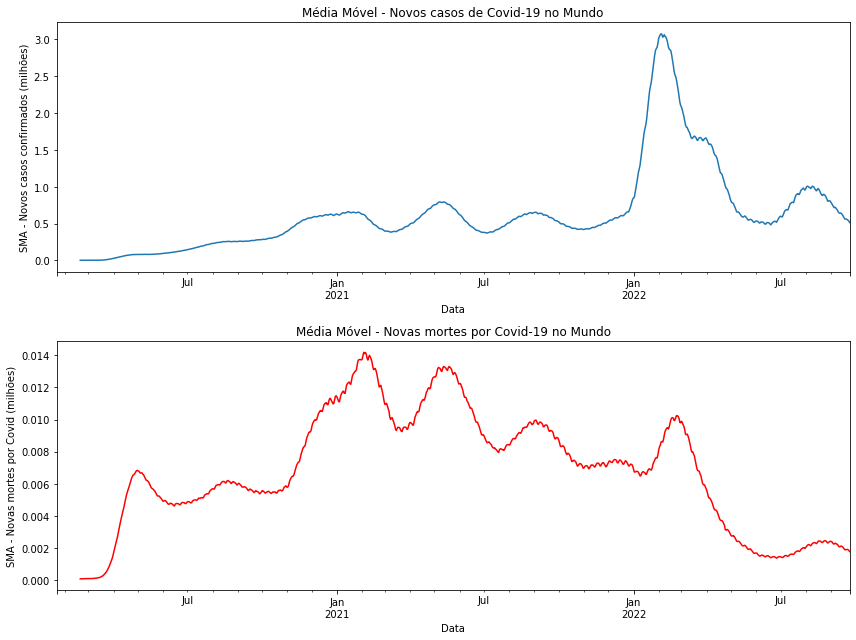

In [183]:
#plotar o número de casos confirmados e de mortes
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols=1, figsize=(12,9)) #criando duas variáveis

(df_world['new_cases_SMA'] / 1000000).plot(kind="line", ax=ax1)
ax1.set_title("Média Móvel - Novos casos de Covid-19 no Mundo")
ax1.set_ylabel("SMA - Novos casos confirmados (milhões)")
ax1.set_xlabel("Data")

(df_world['new_deaths_SMA'] / 1000000).plot(kind="line", ax=ax2, color="r")
ax2.set_title("Média Móvel - Novas mortes por Covid-19 no Mundo")
ax2.set_ylabel("SMA - Novas mortes por Covid (milhões)")
ax2.set_xlabel("Data")

plt.tight_layout()
plt.savefig('SMA_cases_and_deaths_world.png')

Como vemos, a Média Móvel para o número de casos (Gráfico 1 - Azul) nos mostra que tivemos no ano de 2022, entre 24 e 25 meses após o início da pandemia, o pior cenário, ou seja, o maior registro de casos para o Covid no mundo. Agora, entramos no segundo semestre de 2022 com uma tendência de queda nos registros de casos.

Já no gráfico de registros de mortes (Gráfico 2 - vermelho), estamos no melhor período da pandemia com relação às mortes, ou seja, desde o seu início em Janeiro/2020, está sendo registrado os menores índices de mortes por Covid no mundo, também passando por uma têndencia de queda.

###Como foi o crescimento dos casos de Covid-19 nos países que mais tem casos registrados?

Os dados compilados e fornecidos pela OWiD tem a primeira entrada do dia 01/01/2020. Desde essa data os dados foram coletados, consolidados e distribuidos publicamente, diariamente.

Para percebermos a história da pandemia nesses últimos anos, vou plotar um "Bar Chart Race" para alguns países que irei definir a seguir. Nesse gráfico, irei plotar os dados de casos de Covid-19.

In [125]:
#primeira data registrada no dataframe
df.date.min()

'2020-01-01'

O nosso *DataFrame*, como citado anteriormente, possui a listagem de 231 itens (países, localizades, continentes e classes de rendas). A biblioteca do *Bar Chart Race* não demonstrou capacidade de compilar o gráfico para todos os países, por isso, vou eleger 10 países que possuem mais casos de covid na data atual para nossa visualização.

Esses "top 10" já foi identificado no tópico anterior, registrado no *DataFrame* `top10_total_cases`. Serão esses países que irei aplicar.

In [126]:
#lista dos 10 países com mais casos
top10_total_cases

location  total_cases
207358   United States    96.065161
90889            India    44.568114
69830           France    35.149836
28132           Brazil    34.624427
74517          Germany    32.952050
183914     South Korea    24.620128
206381  United Kingdom    23.621956
98454            Italy    22.284812
100359           Japan    21.013547
163513          Russia    20.447507

In [134]:
#definindo a lista de países
values = top10_total_cases.location

#criando dataframe com os países eleitos
df_cases_paises = df_clean[df_clean.location.isin(values)].copy()

#verificar tamanho do dataframe
print("\nEntradas do dataframe: \t{}".format(df_cases_paises.shape[0]),
      "\nVariáveis do dataframe: {}".format(df_cases_paises.shape[1]))


Entradas do dataframe: 	9694 
Variáveis do dataframe: 61


Para gerar um "Bar Chart Race" precisamos de um *DataFrame* com uma estrutura padronizada. Vou definí-lo apenas com as variáveis necessárias: `date`, `location` e `total_cases`.

In [135]:
#criar dataframe apenas com países
df_cases_paises = df_cases_paises[['date', 'location', 'total_cases']].sort_values(by='date', ascending=True)

#verificar tamanho do dataframe
print("\nEntradas do dataframe: \t{}".format(df_cases_paises.shape[0]),
      "\nVariáveis do dataframe: {}".format(df_cases_paises.shape[1]))


Entradas do dataframe: 	9694 
Variáveis do dataframe: 3


In [136]:
#visualizar entradas do dataframe
df_cases_paises.head()

date       location  total_cases
206382 2020-01-22  United States          1.0
99383  2020-01-22          Japan          2.0
182938 2020-01-22    South Korea          1.0
99384  2020-01-23          Japan          2.0
206383 2020-01-23  United States          1.0

Agora preciso reestruturar o *DataFrame* em uma tabela com as entradas listadas por data e nas colunas (variáveis) os países. Vou fazer isso a partir da função `pivot_table`, do pandas.

In [137]:
#criando tabela reestruturada
df_pivot_table = pd.pivot_table(df_cases_paises, values=['total_cases'], index=['date'], columns=['location'], aggfunc=np.sum)

#visualizar tabela
df_pivot_table.head()

total_cases                                                      \
location        Brazil France Germany India Italy Japan Russia South Korea   
date                                                                         
2020-01-22         NaN    NaN     NaN   NaN   NaN   2.0    NaN         1.0   
2020-01-23         NaN    NaN     NaN   NaN   NaN   2.0    NaN         1.0   
2020-01-24         NaN    2.0     NaN   NaN   NaN   2.0    NaN         2.0   
2020-01-25         NaN    3.0     NaN   NaN   NaN   2.0    NaN         2.0   
2020-01-26         NaN    3.0     NaN   NaN   NaN   4.0    NaN         3.0   

                                         
location   United Kingdom United States  
date                                     
2020-01-22            NaN           1.0  
2020-01-23            NaN           1.0  
2020-01-24            NaN           2.0  
2020-01-25            NaN           2.0  
2020-01-26            NaN           5.0

Agora, preciso converter a *pivot table* em um *DataFrame*, para poder manipular os dados.

In [138]:
#converter pivot tablem em um dataframe
df_table = df_pivot_table

df_table.columns = df_table.columns.droplevel(0)
df_table.columns.name = None

#visualizar as primeiras entradas
df_table.head()

Brazil  France  Germany  India  Italy  Japan  Russia  South Korea  \
date                                                                            
2020-01-22     NaN     NaN      NaN    NaN    NaN    2.0     NaN          1.0   
2020-01-23     NaN     NaN      NaN    NaN    NaN    2.0     NaN          1.0   
2020-01-24     NaN     2.0      NaN    NaN    NaN    2.0     NaN          2.0   
2020-01-25     NaN     3.0      NaN    NaN    NaN    2.0     NaN          2.0   
2020-01-26     NaN     3.0      NaN    NaN    NaN    4.0     NaN          3.0   

            United Kingdom  United States  
date                                       
2020-01-22             NaN            1.0  
2020-01-23             NaN            1.0  
2020-01-24             NaN            2.0  
2020-01-25             NaN            2.0  
2020-01-26             NaN            5.0

Como vimos nas duas tabelas acima, nosso *DataFrame* possui valores ausentes. De acordo com a documentação do nosso *dataset* original (fornececido pela OWiD), em certas datas os dados podem não ter sido divulgados pelos países ou não eram medidos naquele momento.

**Tratando os valores ausentes**

Vamos primeiro entender quantos são os valores ausentes no nosso *dataframe*.

In [139]:
#identificando valores ausentes.
(df_table.isnull().sum()/ df_table.shape[0]).sort_values(ascending = False)

Brazil            0.035824
Italy             0.009212
Russia            0.009212
India             0.008188
United Kingdom    0.008188
Germany           0.005118
France            0.002047
Japan             0.000000
South Korea       0.000000
United States     0.000000
dtype: float64

Vejam que os valores ausentes não chegam nem a 1% em alguns países e outros ficam abaixo ainda de 0.5%. 

Vou tomar como medida, excluir as entradas com pelo menos 1 valor ausente. Como o percentual de valores é pequeno, o impacto nos dados de nosso *DataFrame* não irá trazer prejuízos para nossa visualização. Também já irei deixar o *DataFrame* ordenado por data em ordem crescente, pois precisarei dessa característica mais adiante.

In [140]:
#excluir entradas com pelo menos 1 valor ausente
df_table2 = df_table.dropna().sort_values(by = 'date', ascending = True)

#verificar tamanho do dataframe
print("\nEntradas do dataframe antes: \t{}".format(df_table.shape[0]),
      "\nEntradas do dataframe depois: \t{}".format(df_table2.shape[0]))


Entradas do dataframe antes: 	977 
Entradas do dataframe depois: 	942


Em nosso *DataFrame* permanecem ainda 940 entradas de registros diários destes mais de 2 anos de pandemia. Se eu tentasse plotar um "Bar Char Race" com esses dados, teríamos uma visualização muito longa da evolução mostrada no gráfico e certamente a leitura e a interpretação ficarão prejudicados. 

Portanto, vou reduzir o nosso *dataset* para registros semanais, mantendo a primeira data de cada semana que ainda temos.

In [141]:
#criar uma cópia do dataframe
df_table3 = df_table2.copy()

#inserir nova coluna para Month (Mês)
df_table3.insert(9, "Week", pd.DatetimeIndex(df_table3.index).week, True)

#inserir nova coluna para identificar quando o mês se altera
df_table3.insert(10, "Week_Diff", df_table3.Week.diff(), True)

#visualizar primeiras entradas
df_table3.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  """


Brazil  France  Germany  India   Italy  Japan  Russia  \
date                                                                
2020-02-26     1.0    18.0     21.0    3.0   453.0  192.0     2.0   
2020-02-27     1.0    38.0     26.0    3.0   655.0  218.0     2.0   
2020-02-28     1.0    57.0     53.0    3.0   888.0  236.0     2.0   
2020-02-29     2.0   100.0     66.0    3.0  1128.0  245.0     2.0   
2020-03-01     2.0   130.0    117.0    3.0  1694.0  259.0     2.0   

            South Korea  United Kingdom  Week  Week_Diff  United States  
date                                                                     
2020-02-26       1261.0            37.0     9        NaN           16.0  
2020-02-27       1766.0            44.0     9        0.0           17.0  
2020-02-28       2337.0            56.0     9        0.0           17.0  
2020-02-29       3150.0            61.0     9        0.0           25.0  
2020-03-01       3736.0            94.0     9        0.0           32.0

Agora, na virada de cada semana o valor mostrado na variável `Week_Diff` será maior que 1. Todos os registros que forem igual a 0 (zero) poderei excluir.

In [143]:
#reduzindo tamanho do dataframe
df_table3.drop(df_table3.loc[df_table3.Week_Diff==0].index, inplace=True)

#verificar tamanho do dataframe
print("\nEntradas do dataframe antes: \t{}".format(df_table2.shape[0]),
      "\nEntradas do dataframe depois: \t{}".format(df_table3.shape[0]))


Entradas do dataframe antes: 	942 
Entradas do dataframe depois: 	135


Nosso *DataFrame* foi reduzido de 938 entradas para apenas 135 registros semanais. Agora vou excluir as colunas desenecessárias para plotar o "Bar Char Race".

In [144]:
#excluir variáves Month e Month_Diff
df_table3.drop(['Week', 'Week_Diff'], axis=1, inplace=True)

#visualizar primeiras entradas
df_table3.head()

Brazil   France  Germany  India    Italy   Japan  Russia  \
date                                                                   
2020-02-26     1.0     18.0     21.0    3.0    453.0   192.0     2.0   
2020-03-02     2.0    191.0    150.0    5.0   2036.0   278.0     3.0   
2020-03-09    25.0   1411.0   1112.0   43.0   9172.0   527.0    17.0   
2020-03-16   200.0   6680.0   6012.0  119.0  27980.0   843.0    90.0   
2020-03-23  1924.0  20094.0  22672.0  499.0  63927.0  1144.0   438.0   

            South Korea  United Kingdom  United States  
date                                                    
2020-02-26       1261.0            37.0           16.0  
2020-03-02       4335.0           134.0           55.0  
2020-03-09       7478.0           629.0          594.0  
2020-03-16       8236.0          3684.0         4679.0  
2020-03-23       8961.0         12668.0        46096.0

Com nossos dados formatados, podemos então criar um "Bar Chart Race". Vejamos:

In [145]:
# plotando o gráfico
bcr.bar_chart_race(df=df_table3, filename=None)

*Recomendo a visualização do "Bar Chart Race" diretamente no Google Colab*. [Clique aqui.](https://colab.research.google.com/drive/1ANWRYB6dciaxwlXgd-IAu6RvlWqfiYve?usp=sharing)

Aqui um ponto bem interessante é ver que a Korea do Sul (South Korea) até esse ano de 2022 tinha milhares de casos a menos que os demais países, porém, quando os casos por lá começaram a aumentar, tomou uma proporção grande bem rápido.

#O Covid-19 no Brasil

Vou realizar uma análise exploratória para o Brasil, buscando mostrar algumas características da pandemia no país.

###Quando foi registrado a primeira morte?

Sabendo que os dados fornecidos são acumulativos dia a dia, vou tomar como premissa que a primeira morte foi registrada no dia que temos o menor número de mortes em `total_deaths`.



In [146]:
#criando novo dataframe para o Brasil
df_brasil = df_clean.loc[df_clean.location == "Brazil"].copy()

#mostrando o tamanho do dataframe
df_brasil.shape

(942, 61)

In [147]:
#identificar primeiro registro de morte
df_brasil.loc[df_brasil.total_deaths == df_brasil.total_deaths.min()].date

27211   2020-03-17
Name: date, dtype: datetime64[ns]

O primeiro caso de morte no Brasil foi registrado no dia 17/03/2020.

###Quando foi registrado o primeiro caso de Covid-19 no Brasil?

Partirei da mesma premissa da análise anterior, considerando que o primeiro caso está registrado na data que possui o menor número de casos positivos de Covid-19.

In [187]:
#identificar primeiro registro de casos
df_brasil.loc[df_brasil.total_cases == df_brasil.total_cases.min()].date

date
2020-02-26   2020-02-26
2020-02-27   2020-02-27
2020-02-28   2020-02-28
Name: date, dtype: datetime64[ns]

Temos 3 datas consecutivas com o mesmo "menor número de casos" no mês de fevereiro de 2020. Concluímos então que o primeiro caso de covid foi registrado no dia 26/02/2020. 
Nessa data, era quarta-feira de cinzas daquele ano. 

O primeiro registro de Covid-19 no Brasil aconteceu no carnaval de 2020. Ainda não havia lockdown no país nesse período.

In [188]:
#dias entre primeiro caso e primeira morte
prim_morte = df_brasil.loc[df_brasil.total_deaths == df_brasil.total_deaths.min()].date
prim_caso = df_brasil.loc[df_brasil.total_cases == df_brasil.total_cases.min()].date.min()

prim_morte - prim_caso

date
2020-03-17   20 days
Name: date, dtype: timedelta64[ns]

Foram 20 dias entre o registro de primeiro caso de Covid-19 no Brasil e o registro da primeira morte.

###Como foi o crescimento dos casos e mortes no Brasil?

Vou plotar gráficos em escala linear e logarítmica para visualizarmos a evolução no Brasil ao longo da pandemia.

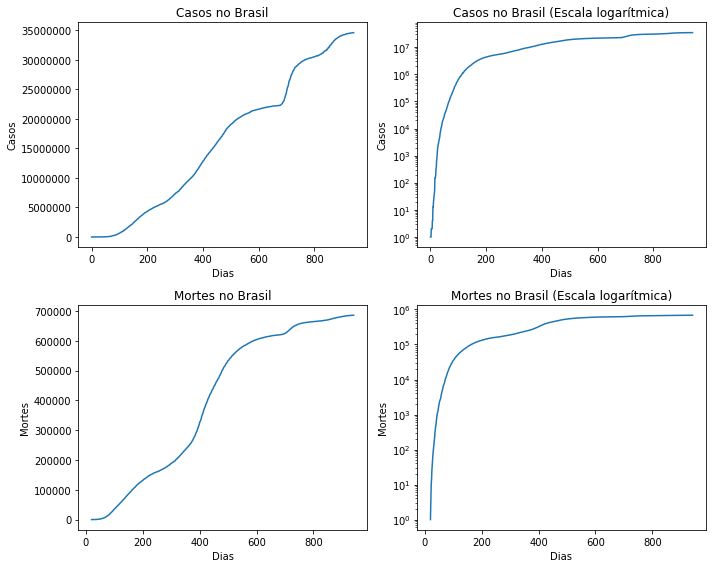

In [189]:
#definindo novo index para dataframe
df_brasil.index = df_brasil.date

# Plotar gráficos de linha em escalas linear e logarítmica para os casos totais e mortes totais.
x = list(range(df_brasil.shape[0]))
z = df_brasil['total_cases']
z2 = df_brasil['total_deaths']

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
#fig, ((ax1, ax3)) = plt.subplots(nrows=2, ncols=1, figsize=(12, 9))

ax1.set_title('Casos no Brasil')
ax1.set_xlabel('Dias')
ax1.set_ylabel('Casos')
ax1.ticklabel_format(useOffset=False, style='plain')
ax1.plot(x, z)


ax2.set_title('Casos no Brasil (Escala logarítmica)')
ax2.set_xlabel('Dias')
ax2.set_ylabel('Casos')
ax2.set_yscale('log')
ax2.plot(x, z)

ax3.set_title('Mortes no Brasil')
ax3.set_xlabel('Dias')
ax3.set_ylabel('Mortes')
ax3.plot(x, z2)

ax4.set_title('Mortes no Brasil (Escala logarítmica)')
ax4.set_xlabel('Dias')
ax4.set_ylabel('Mortes')
ax4.set_yscale('log')
ax4.plot(x, z2)

plt.tight_layout()

Além de analisar os dados acumulados, é importante entender as têndencias, como citei anteriormente. Para isso, vou analisar a Média Móvel Simples (SMA) para os novos registros de casos e de novas mortes no Brasil.

In [190]:
#verificar se existem valores ausentes em new_cases e new_deaths
print("\nValores ausentes em new_cases: {}".format(df_brasil.new_cases.isnull().sum()))
print("\nValores ausentes em new_deaths: {}".format(df_brasil.new_deaths.isnull().sum()))


Valores ausentes em new_cases: 4

Valores ausentes em new_deaths: 23


Como existem valores ausentes nas entradas, vou tomar a decisão de excluí-las, para não intereferirem na Média Móvel de cada variável.


In [191]:
#excluir valores ausentes new_cases
df_brasil.drop(df_brasil[df_brasil.new_cases.isnull()].index, axis=0, inplace=True)

#excluir valores ausentes new_deaths
df_brasil.drop(df_brasil[df_brasil.new_deaths.isnull()].index, axis=0, inplace=True)

#verificar se existem valores ausentes em new_cases e new_deaths
print("\nValores ausentes em new_cases: {}".format(df_brasil.new_cases.isnull().sum()))
print("\nValores ausentes em new_deaths: {}".format(df_brasil.new_deaths.isnull().sum()))


Valores ausentes em new_cases: 0

Valores ausentes em new_deaths: 0


Agora, posso calcular a média móvel para os regristros do nosso país.

In [192]:
#adicionar SMA (Média Móvel Simples) para total_cases
df_brasil.insert(df_brasil.shape[1],"new_cases_SMA", df_brasil.new_cases.rolling(window=30).mean(), True)

#adicionar SMA (Média Móvel Simples) para total_deaths
df_brasil.insert(df_brasil.shape[1],"new_deaths_SMA", df_brasil.new_deaths.rolling(window=30).mean(), True)

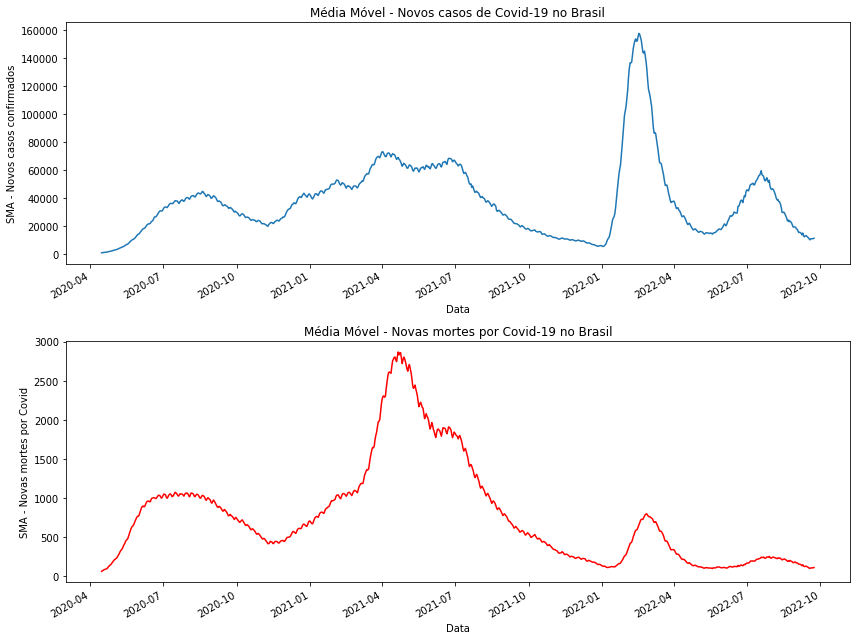

In [195]:
#plotar o número de casos confirmados e de mortes
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols=1, figsize=(12,9)) #criando duas variáveis

(df_brasil['new_cases_SMA']).plot(kind="line", ax=ax1)
ax1.set_title("Média Móvel - Novos casos de Covid-19 no Brasil")
ax1.set_ylabel("SMA - Novos casos confirmados")
ax1.set_xlabel("Data")

(df_brasil['new_deaths_SMA']).plot(kind="line", ax=ax2, color="r")
ax2.set_title("Média Móvel - Novas mortes por Covid-19 no Brasil")
ax2.set_ylabel("SMA - Novas mortes por Covid")
ax2.set_xlabel("Data")

plt.tight_layout()
plt.savefig('SMA_cases_and_deaths_Brasil.png')

Vejamos que, acompanhando o ritmo e tendência mundial, a pandemia teve seus maiores picos de casos no início desse ano (2022). E agora, no segundo semestre desse ano, seguimos com o número de casos e de mortes em queda.

###Como estão os novos casos e novas mortes nos últimos 30 dias?

Para entendermos se a pandemia tem diminuido o seu ritmo no país, vou explorar os dados dos últimos 30 dias registrados.

In [57]:
#criando novo dataframe últimos 30 dias
df_brasil_30 = df_brasil.tail(30).copy()

#média de novos casos 
media_casos = df_brasil_30.new_cases.mean()

#média de novas mortes
media_mortes = df_brasil_30.new_deaths.mean()

print("\nMédia de novos casos nos últimos 30 dias: \t{:.0f} novos casos".format(media_casos),
      "\nMédia de novas mortes nos últimos 30 dias: \t{:.0f} novas mortes".format(media_mortes))


Média de novos casos nos últimos 30 dias: 	11323 novos casos 
Média de novas mortes nos últimos 30 dias: 	107 novas mortes


A média de 11,4 mil novos casos por dia no país impressiona. Vou buscar qual foi o maior pico que tivemos de registros no país.

In [58]:
#maior registro de novos casos
maior_casos = df_brasil.new_cases.max()

#data maior registro de novos casos
data_maior_casos = df_brasil.loc[df_brasil.new_cases == maior_casos, 'date'].values[0]

print("\nMaior registro de novos casos em um único dia: \t{:.0f} novos casos".format(maior_casos),
      "\nEsse registro aconteceu no dia {}" .format(data_maior_casos))


Maior registro de novos casos em um único dia: 	287149 novos casos 
Esse registro aconteceu no dia 2022-02-03T00:00:00.000000000


Vemos que o pico de registro de novos casos em um único dia aconteceu nesse ano de 2022, quase dois anos após o primeiro registro de Covid no Brasil.

In [185]:
#data maior registro de novos casos
total_cases_atual_brasil = df_brasil.loc[df_brasil.date == data_atual, 'total_cases'].values[0] / 1000000
total_deaths_atual_brasil = df_brasil.loc[df_brasil.date == data_atual, 'total_deaths'].values[0] / 1000000


print("\nRegistros em {}".format(data_atual),
      "\nNúmero de casos: \t{:3f} milhões casos".format(total_cases_atual_brasil),
      "\nNúmero de mortes: \t{:.3f} milhões mortes".format(total_deaths_atual_brasil))


Registros em 2022-09-24 
Número de casos: 	34.624427 milhões casos 
Número de mortes: 	0.686 milhões mortes


#Conclusão

* Como citei no início do desse projeto, os dados são atualizados diariamente, então, essa análise pode se tornar obsoleta rapidamente. 

* Durante nossa breve análise, digo breve pois não explorei todas as 67 variáveis disponíveis, pudemos entender melhor a dimensão da pandemia no Brasil e no Mundo.

* O Brasil, está no topo entre os países com mais casos e mais mortes, mas quando analisamos proporcionalmente as mortes com o número da população, o Brasil cai para 17º colocação. Também vimos que não há uma relação direta entre casos e mortes, pois como mostrei, países listados entre os com "mais mortes" não estão entre os com "mais casos".

* A pandemia já está presente no mundo pelo terceiro ano consecutivo. Esse ano de 2022 tem sido importante para muitos países, como a Korea do Sul, que teve uma crescente de casos muito significativa em um poucos meses. Nesse ano, o Brasil teve o record de registro de casos em um único dia (287 mil casos registrados na quinta-feira de 03/02/2022).

* No Brasil, ainda temos muitos casos registrados diariamente.


Por fim, essa análise exploratória mostrou que a pandemia ainda faz parte do cenário global e nacional, e deixa uma mensagem implícita de que devemos ainda dar atenção aos efeitos causados pelo Corona Vírus.